## Bitcoin: XBTUSD, XBTXAU, XBTCNY

Ben Bernanke, as Federal Reserve Chairman, in his 6 September 2013 letter 
to a Senate committee wrote that Bitcoin and other virtual currencies 
"*may hold long-term promise, particularly if the innovations
promote a faster, more secure and more efficient **payment system***." 
[See http://goo.gl/49I5ZI for the full letter.] 

Here we demonstrate how Bitcoin ("XBT") data can be statistically analyzed 
as a ***financial asset***.

- 2016-12-30 *The annualized XBTUSD volatility is 112%, which is astonishing.* 
  This implies (within less than one standard deviation!) that it is 
  equally probable in the coming year that Bitcoin will be 
  totally worthless or roughly double in price.

**This extremely high volatility may hinder its general acceptance as a payment system.** 
It role as store of value is speculative, but it may provide 
diversification for an optimal portfolio (see Appendix 2). 
*The annualized mean geometric return for XBTUSD is currently +128% 
over the last six years*, through two sharp peaks visible on our plots.


- For comparative valuation, we investigate XBTXAU (in terms of gold troy ounces) and 
  XBTCNY (in terms of Chinese yuan, due to Bitcoin mining predominantly in China).

    - As of 2017-02-07, one Bitcoin was insufficient to buy one troy ounce of gold, 
      but the peaks of XBTXAU indicates temporary surge efforts 
      (all-time high was 0.945 troy ounces on 2017-01-05 which is 
      comparable to the 2013-12-04 record).

    - The correlation between XBTUSD and XBTCNY 
      is +0.998 as of 2017-02-19, 
      which is why their charts appear so similar if we disregard 
      the units shown for the y-axis.

    - The computation of mean geometric return also shows that 
      the expected financial returns for XBTCNY is practically identical 
      to those for XBTUSD in their respective locale.


- The upper bound on the number of Bitcoins is 21 million. 
  This limit has economic consequences [to be discussed in a forthcoming notebook].

In 2013, the Foreign Exchange team at Bank of America (David Woo, Ian Gordan, et al.) 
produced its first assessment in an extensive 14-page report:
"our fair value analysis implies a maximum market capitalization of Bitcoin 
of \$15bn (1 BTC = 1300 USD)." *Capitalization is in fact currently about **16 billion USD***, 
and we provide a method to compute that statistic daily.

The utility of Bitcoin as means of payment or transfer seems to
outweight its speculative quality as store of value from the viewpoint 
of a Chinese user under government restrictions on capital flow out of China.

The value of Bitcoin specifically as a decentralized timestamped database ("blockchain") 
verifiable by all users has not been determined.

- Our robust optimization produces a model which outperforms an AR(1) with unit root 
for one-step ahead forecasts by using a median absolute error loss function. 
This finding is used to smooth the volatile Bitcoin price path ("XBTema").

### Note on abbreviation

“**BTC**” has been the generally accepted notation for Bitcoin. 
Its creator, Satoshi Nakamoto, refers to it as "BTC".
Bitcoin is decentralized by design so there was no standard 
to dictate what its official symbol should be. 
There may be confusion with the Bhutanese colón currency.

Then "**XBT**" was proposed via International Standards Organization (ISO 4217) 
which maintains a list of abbreviated currencies and precious metals 
(for example, XAU is gold). 
Some exchanges began to adopt "XBT" and it is currently used by Bloomberg. 
Major banks experimenting with blockchain technology seem to favor "XBT".

*Dependencies:*

- Repository: https://github.com/rsvp/fecon235
- Python: matplotlib, pandas
     
*CHANGE LOG*

    2017-02-19  Add XBTCNY analysis.
    2017-02-07  Add references. Use newly defined quandlcodes.
    2016-12-31  First version.

In [1]:
from fecon235.fecon235 import *

In [2]:
#  PREAMBLE-p6.15.1223 :: Settings and system details
from __future__ import absolute_import, print_function
system.specs()
pwd = system.getpwd()   # present working directory as variable.
print(" ::  $pwd:", pwd)
#  If a module is modified, automatically reload it:
%load_ext autoreload
%autoreload 2
#       Use 0 to disable this feature.

#  Notebook DISPLAY options:
#      Represent pandas DataFrames as text; not HTML representation:
import pandas as pd
pd.set_option( 'display.notebook_repr_html', False )
from IPython.display import HTML # useful for snippets
#  e.g. HTML('<iframe src=http://en.mobile.wikipedia.org/?useformat=mobile width=700 height=350></iframe>')
from IPython.display import Image 
#  e.g. Image(filename='holt-winters-equations.png', embed=True) # url= also works
from IPython.display import YouTubeVideo
#  e.g. YouTubeVideo('1j_HxD4iLn8', start='43', width=600, height=400)
from IPython.core import page
get_ipython().set_hook('show_in_pager', page.as_hook(page.display_page), 0)
#  Or equivalently in config file: "InteractiveShell.display_page = True", 
#  which will display results in secondary notebook pager frame in a cell.

#  Generate PLOTS inside notebook, "inline" generates static png:
%matplotlib inline   
#          "notebook" argument allows interactive zoom and resize.

 ::  Python 2.7.13
 ::  IPython 5.1.0
 ::  jupyter_core 4.2.1
 ::  notebook 4.1.0
 ::  matplotlib 1.5.1
 ::  numpy 1.11.0
 ::  pandas 0.19.2
 ::  pandas_datareader 0.2.1
 ::  Repository: fecon235 v5.16.1225 develop
 ::  Timestamp: 2017-02-21, 00:36:03 UTC
 ::  $pwd: /media/yaya/virt15h/virt/dbx/Dropbox/ipy/fecon235/nb


## Bitcoin data

Source: https://www.quandl.com/data/BCHAIN-Blockchain which also offers:

- Number of Unique Bitcoin Addresses Used
- Total Number of Transactions
- Average Transaction Confirmation Time
- Miners Revenue

We pre-defined quandcodes for Bitcoin count and USD price.

In [3]:
#  d7 means frequency of 7 days per week:
xbt = get( d7xbtusd )       # Bitcoin price in USD (approx. 960 USD)
xbtN = get( d7xbtcount )    # number of Bitcoins mined thus far (approx. 16 million)

#  Market capitalization will computed by multiplying the two: approx. 16 billion USD.
#  Double check: d4xbtCap = 'BCHAIN/MKTCP' 

***The beginning of Bitcoin dates back to 2009.*** 
There is a period of novelty during which  
prices could be approximated by zero.

For the purpose of statistical analysis, we provide 
a convenient constant called "***begin***" for a starting date 
(which can be simply modified to redo this entire notebook).

Unlike traditional financial assets, Bitcoin data 
is available daily, including weekends and holidays -- 
thus care must be exercised in any cross-asset comparisons 
(for example, in the annualization of volatility).

In [4]:
#  Define some constants which may be changed to redo this notebook:

begin = '2011-01-01'  # NOT the actual historical Bitcoin start.

## Bitcoin capitalization

What is valuation of the entire Bitcoin market?

2016-12-29 approx. 15.7 million USD.

In [5]:
#  Bitcoin CAPITALIZATION = price * Number
xbtCap = todf(xbt * xbtN)

#  See plot below...

### Note on the Number of Bitcoins, xbtN

*The number of Bitcoins generated per block is set to 
decrease geometrically, with a 50% reduction every 210,000 blocks.* 
**Thus the number of Bitcoins in existence is not expected to ever exceed 21 million.** 
(As of 2016-12-29 there were over 16 million Bitcoins mined.)

[Ignoring the unspendable genesis block, the sundry lost coins 
and unclaimed rewards, the maximum number of Bitcoins is 
technically 20999999.9769.]

**Currently about 98% of Bitcoin mining originates from China** (source: WSJ). 
David Woo at Bank of America back in 2013 pointed out: 
"The correlation between CNY’s share of volume of all Bitcoin exchanges 
and price of Bitcoin is high and rising." 
Later we shall investigate Bitcoin's relationship to 
the Chinese yuan.

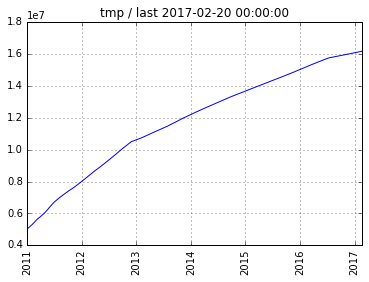

In [6]:
#  Plot Number of Bitcoins:
plot( xbtN[begin:] )

#  Steady and concave, progressing toward maximum at slower rate...

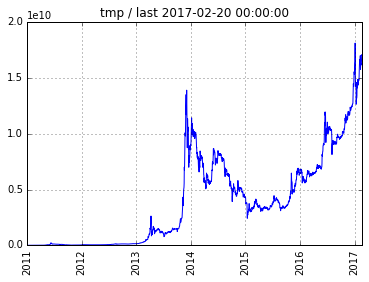

In [7]:
#  Plot CAPITALIZATION in US dollar unit:
plot( xbtCap[begin:] )

In [8]:
#  Plot PRICE in USD, ie XBTUSD:
#  plot( xbt[begin:] )

#  Instead, please see plot of its optimized model below...

In [9]:
#  List of dataframes:
dflist = [xbt, xbtN, xbtCap]

#  Create Bitcoin DataFrame:
xbtdf = paste( dflist )
xbtdf.columns = ['Price', 'Number', 'Capitalization']

In [10]:
stats( xbtdf[begin:] )

             Price        Number  Capitalization
count  2242.000000  2.242000e+03    2.242000e+03
mean    277.082251  1.181588e+07    3.922023e+09
std     275.172251  3.134500e+06    4.067454e+09
min       0.298998  5.027250e+06    1.508165e+06
25%      11.492750  9.455012e+06    1.059641e+08
50%     233.745000  1.231280e+07    3.323239e+09
75%     453.080000  1.448108e+07    6.570283e+09
max    1151.000000  1.617275e+07    1.812207e+10

 ::  Index on min:
Price            2011-01-05
Number           2011-01-01
Capitalization   2011-01-01
dtype: datetime64[ns]

 ::  Index on max:
Price            2013-12-04
Number           2017-02-20
Capitalization   2017-01-05
dtype: datetime64[ns]

 ::  Head:
               Price     Number  Capitalization
T                                              
2011-01-01  0.299998  5027250.0    1.508165e+06
2011-01-02  0.299996  5036250.0    1.510855e+06
2011-01-03  0.299998  5044450.0    1.513325e+06
 ::  Tail:
                  Price      Number  Capital

The correlation matrix shows that capitalization 
is strongly correlated with price as expected, 
but an all-time high in capitalization may not 
necessarily indicate an all-time high in price.

**The median Bitcoin price is \$234 USD** (as of 2017-02-19).

## Bitcoin price

On a given day, Bitcoin is not traded on a single centralized exchange, 
but rather globally in many different foreign currencies. 
Therefore the daily price in USD must be considered a *polled* approximation.

*Unlike traditional financial assets, price is discovered every 
single day of the year.* Weekends and holidays are trading days, 
so the *xbt* series reflects this fact.

The price movement is highly erratic, 
so let us look at some statistical characteristics.

In [11]:
#  See the raw price series by uncommenting:
#  xbt

In [12]:
#  Geometric mean return, for explanation execute: "georet??"
georet( xbt[begin:], yearly=365 )

# Note that yearly=365, not 256 like usual business "daily" data.

[127.85, 189.76, 111.28, 365, 2243, '2011-01-01', '2017-02-20']

2016-12-30  The annualized volatility is 112%, which is astonishing. 
This implies (within less than one standard deviation!) that 
it is **equally probable in the coming year that Bitcoin 
will be totally worthless or roughly double in price.**

So "investing" in Bitcoins would be speculative indeed, 
but on the other hand, the annualized geometric mean return 
is approximately +130%.

Given the above, it may be unreasonable to predict the price of 
Bitcoin just from time-series methods. 
Nonetheless, let us see how an optimized Holt-Winters model would fit.

In [13]:
# optimize_holtforecast( xbt[begin:], grids=50 )

[This time-consuming analysis can be run by uncommenting the previous input line.]

Our robust optimization produces a model which outperforms an AR(1) with unit root 
for one-step ahead forecasts by using a median absolute error loss function. 
This finding is used to smooth the volatile Bitcoin price path ("XBTema"), 
and we summarize the Holt-Winters models as follows:

$H( \alpha, \beta ) = H( 0.857, 0 )$

which indicates no trend overall since beta is estimated to be zero. 
However, the state of Bitcoin can be captured solely by the alpha coefficient. 
Mathematically, our model reduces to an exponentially weighted moving average.

Economically this smoothing process can also be justified due to the nature 
of the polled approximation of XBTUSD especially when the trading is thin.

In [14]:
#  Define "XBTema"
#  Exponential moving average using Holt-Winters alpha:
xbtema = ema( xbt, 0.857 )

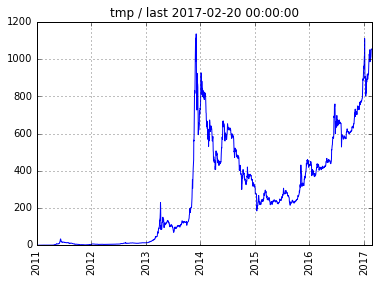

In [15]:
#  Plot PRICE in USD as exponential moving average:
plot( xbtema[begin:])

In [16]:
#  Geometric mean return of smoothed process:
georet( xbtema[begin:], yearly=365 )

[129.68, 176.79, 97.07, 365, 2243, '2011-01-01', '2017-02-20']

2017-02-19 Our H-W ema model yields an annualized volatility of 97%, 
down from 112% using raw price. 
But the annualized geometric mean return still remains around +130%.

[For comparative stats, see Appendix 1.]

## Relationship to Gold: XAU

First we investigate whether any linear relationship 
exists between XBT and XAU, the perennial store of value. 

We shall rely on Python's *pandas* to handle the date alignment 
correctly in all our statistical analysis henceforth.

In [17]:
#  Download daily Gold, its London PM fix, in USD:
xau = get( d4xauusd )

In [18]:
#  We shall use the fitted XBT price in our regression:
stat2( xbtema[begin:]['Y'], xau[begin:]['Y'] )

 ::  FIRST variable:
count    2243.000000
mean      276.971940
std       274.968526
min         0.299018
25%        11.546564
50%       233.471013
75%       452.661707
max      1136.596698
Name: Y, dtype: float64

 ::  SECOND variable:
count    1601.000000
mean     1382.739163
std       206.886760
min      1049.400000
25%      1220.500000
50%      1315.900000
75%      1586.250000
max      1895.000000
Name: Y, dtype: float64

 ::  CORRELATION
-0.660684513381
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     1239.
Date:                Mon, 20 Feb 2017   Prob (F-statistic):          2.07e-201
Time:                        16:36:27   Log-Likelihood:                -10804.
No. Observations:                1601   AIC:                    

There is a weak negative correlation between Bitcoin and gold (-0.67 on 2016-12-30). 
The linear regression itself is unremarkable (R-squared of 0.44).

### Bitcoin exchange rate, XBTXAU, in gold troy ounces

Let us now visualize the relationship between gold 
and Bitcoin by pricing the former in terms of the latter, 
that is to say, amount of gold in troy ounces which can 
be purchased by one Bitcoin.

In [19]:
#  Compute cross-rate in terms of troy ounces:
xbtxau = todf( xbtema / xau )

#  Note we use optimized xbt prices here.

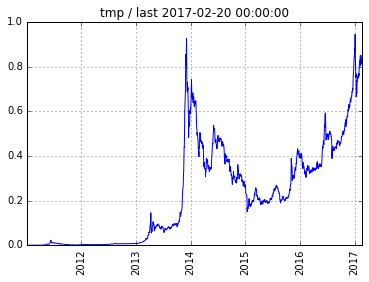

In [20]:
plot( xbtxau[begin:] )

The plots of *xbtema* (scaled in USD) and *xbtxau* (scaled in troy ounces) 
will look very similar since the correlation between the two 
ranges from 0.97 to 0.99 depending on the time frame.

As of 2017-02-07, one Bitcoin was insufficient to buy one troy ounce 
of gold, but the peaks of XBTXAU indicates temporary surge efforts 
(all-time high was 0.945 troy ounces on 2017-01-05 
which is comparable to the 2013-12-04 record).

## Chinese point of view

It is well-known that almost all Bitcoin mining takes place in China, 
and that Bitcoin is used to circumvent government and banking barriers 
on capital flows out of mainland China.

We shall use the onshore Chinese Yuan (CNY) exchange rate, 
imposed upon subjects in China, rather then the offshore rate (CNH) 
freely traded in Hong Kong against the US dollar.

In [21]:
#  Onshore "official" Chinese yuan rate against USD:
cny = get( d4usdcny )

#  The frequency here is the business daily, not 7 days/week.

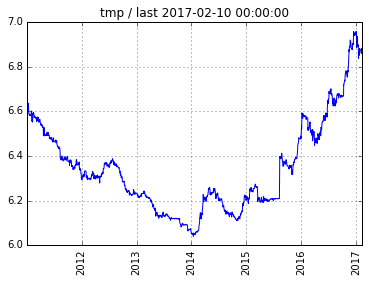

In [22]:
plot( cny[begin:] )

In [23]:
stat2( xbtema[begin:]['Y'], cny[begin:]['Y'] )

#  The differing frequencies are properly handled by pandas.

 ::  FIRST variable:
count    2243.000000
mean      276.971940
std       274.968526
min         0.299018
25%        11.546564
50%       233.471013
75%       452.661707
max      1136.596698
Name: Y, dtype: float64

 ::  SECOND variable:
count    1595.000000
mean        6.344414
std         0.204290
min         6.040200
25%         6.202100
50%         6.306500
75%         6.477200
max         6.958000
Name: Y, dtype: float64

 ::  CORRELATION
0.25054988374
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     106.7
Date:                Mon, 20 Feb 2017   Prob (F-statistic):           2.96e-24
Time:                        16:36:37   Log-Likelihood:                -11150.
No. Observations:                1595   AIC:                      

2017-02-19 **The claim that the USDCNY rate drives XBTUSD price is wrong**, 
since the correlation between the yuan and Bitcoin is a mere +0.25, 
while the R-squared is nearly zero.

### Repricing Bitcoin in terms of yuan: XBTCNY 

In [24]:
xbtcny = todf( xbtema * cny )

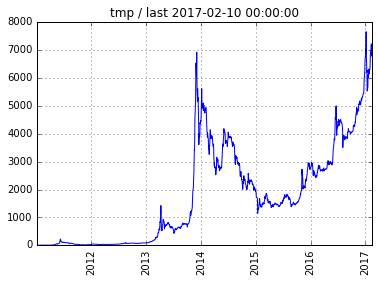

In [25]:
#  Bitcoin price in terms of Chinese yuan:
plot( xbtcny[begin:] )

In [26]:
georet( xbtcny[begin:], yearly=256 )

[127.74, 174.13, 96.33, 256, 1595, '2011-01-03', '2017-02-10']

As shown in Appendix 1, the correlation between XBTema and XBTCNY 
is virtually +1 (in fact, 0.998 as of 2017-02-19) 
which is why their charts appear so similar if we disregard 
the units shown for the y-axis.

The computation of mean geometric return also shows that 
the financial returns for XBTCNY is practically identical 
to those for XBTUSD in their respective locale.

The valuation of Bitcoin, from the Chinese point of view, 
is *perhaps* driven more by its usage as means of payment 
(or transfer, cf. volume data cross-borders) 
than as store of speculative value (relative to gold 
and the US dollar) -- *further geo-localized data would be 
required for this to be convincing*.

The Chinese government exercises considerable influence 
on Bitcoin middlemen under their jurisdiction. 
For example, recently the government imposed mandatory fees 
on Bitcoin transactions through the major Chinese exchanges. 
This demonstrates the *civil* friction which can be introduced by law, 
but it is not inconceivable that Bitcoin may become 
*criminally unlawful* in China. Such an event would 
obviously cause a severe decrease in Bitcoin valuation.


## [Our overall conclusion is summarized at the top]

---

## Appendix 1: Summary stats

In [27]:
#  BitGoldYuan DataFrame
bitgoldyuan = paste( [xbt, xbtema, xau, xbtxau, cny, xbtcny] )
bitgoldyuan.columns = ['XBT', 'XBTema', 'XAU', 'XBTXAU', 'CNY', 'XBTCNY']

In [28]:
stats( bitgoldyuan[begin:] )

               XBT       XBTema          XAU       XBTXAU          CNY  \
count  1595.000000  1595.000000  1595.000000  1595.000000  1595.000000   
mean    274.452680   274.355836  1383.302947     0.221033     6.344414   
std     271.780217   271.625002   207.070416     0.220080     0.204290   
min       0.298998     0.299018  1049.400000     0.000213     6.040200   
25%      11.443827    11.476160  1219.750000     0.006758     6.202100   
50%     233.190000   232.765119  1316.500000     0.196279     6.306500   
75%     451.450000   450.512217  1587.000000     0.372805     6.477200   
max    1151.000000  1136.596698  1895.000000     0.944786     6.958000   

            XBTCNY  
count  1595.000000  
mean   1754.521315  
std    1767.368008  
min       1.969764  
25%      72.971237  
50%    1460.722594  
75%    2912.209840  
max    7656.480390  

 ::  Index on min:
XBT      2011-01-05
XBTema   2011-01-06
XAU      2015-12-17
XBTXAU   2011-01-03
CNY      2014-01-14
XBTCNY   2011-01-05
dtyp

Notes: XAU and CNY are uncorrelated.

---

## Appendix 2: Reference notes

- Brière M., K. Oosterlinck and A. Szafarz, “*Virtual Currency, Tangible  Return: Portfolio Diversification with Bitcoins*", SSRN Working Paper N°2324780, 2013. http://goo.gl/40VIxr

Despite the extreme volatilty, Brière et al. claim Bitcoin-inclusive portfolios 
will deliver superior mean-variance trade-offs than similar Bitcoin-free portfolios. 
They advocated for about 3% Bitcoin inclusion.

